In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Voor deze opdracht willen we een uniform random number generator maken. Voor deze generator heb ik gekozen om de Linear Congruential Method toe te passen. Dit willen we gaan berijken met de formule: $$X_{i+1} = (a * X_{i} + c) \% m$$

Hierdoor wordt er een getal gegenereerd tussen de 0 en m.<br>
Als voorbeeld nemen we: <br>
$ a = 46 $<br>
$ c = 69$<br>
$ m = 100$<br>
En we nemen als startwaarde (de seed): 94.

Dan wordt: $X_{i+1}$ gelijk aan $((46 * 94) + 69) % 100$ = 4393 % 100 = 93.<br>
De nieuwe X wordt dan 93, daarna 47 -> 31 -> 95 -> 39 -> etc.<br>

Deze Random Generator is niet goed. Want na een aantal stappen herhaald hij zichzelf.


In [2]:
def RNG(a = 421, c = 291, m = 10000, seed = 715, num_steps = 10000):
    # https://www.mi.fu-berlin.de/inf/groups/ag-tech/teaching/2012_SS/L_19540_Modeling_and_Performance_Analysis_with_Simulation/06.pdf
    
    RNG_list = np.zeros(num_steps+1) # time
    RNG_list[0] = seed
    if (m > 0) and (a < m) and (c < m) and (seed < m):
        for i in range(num_steps):
            RNG_list[i + 1] = (a * RNG_list[i] + c) % m 

            
        return RNG_list/m
        # divide by m to get values between 0 and 1. 
    else:
        return False

Om deze generator te testen moeten kijken of het uniform is. 
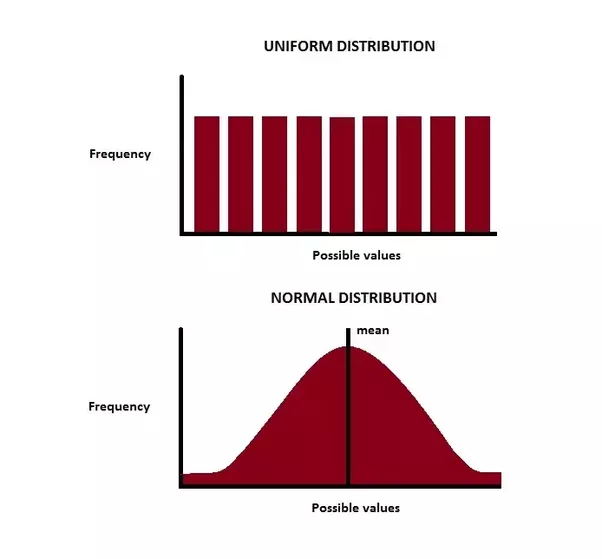

Daarom gaan we een histogram maken van onze Random Number Generator. We kunnen dan direct zien welke verdeling ons model heeft.<br>
Ook zouden we de som van de lijst delen door de lengte rond de 50% moeten uitkomen.

In [3]:
def plot():
    return_lst = []
    return_lst = RNG()
    print(sum(return_lst)/ len(return_lst)*100,"%")
    return_lst.sort()
    plt.hist(return_lst, bins= int(math.sqrt(len(return_lst))))
    # https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram

    plt.show()

49.99071592840714 %


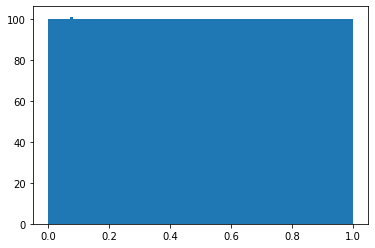

In [4]:
plot()

Nu we weten dat onze simulatie uniform is kunnen we monte carlo gebruiken om $\pi$ te berekenen

In [5]:
def monte_carlo_pi(plot=False):
    pi_list,x,y = [],[],[]
    
    x = RNG(seed = 841)
    y = RNG(seed = 204)
    
    if plot == True:
        plt.scatter(x,y,s=2,c = (x**2 + y**2)<1)
        plt.show()

    pi_list = [(x_curr, y_curr) for x_curr, y_curr in zip(x, y)]

    
    pi_list = [1 if (x**2 + y**2) < 1 else 0 for (x,y) in pi_list]
        
    
    return (sum(pi_list)/ len(pi_list)) * 4

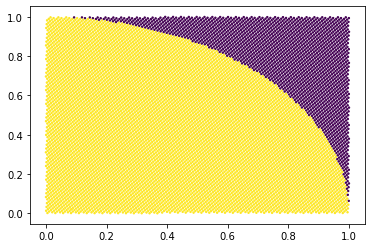

Difference is:  0.0003067821769344725
Calculated pi: 3.1412858714128586


In [6]:
pi = monte_carlo_pi(True)
print("Difference is: " , abs(math.pi - pi))
print("Calculated pi:", pi)

Op deze manier hebben wij $\pi$ berekent door middel van onze random number generator.